In [1]:
using Pkg
Pkg.activate("..")   

  Activating project at `d:\GitHubProjects\GeneralisedKoornwinderPolynomials.jl`


In [2]:
using GeneralisedKoornwinderPolynomials, LinearAlgebra, Plots
using SparseArrays, BlockBandedMatrices, BlockArrays, StaticArrays

α, β, γ, δ, θ, ϵ = 0.0, 0.8, 0.0, 1.0, 4, 0

ρ(x)  = 0.6*x^2+0.2
dρ(x) = 1.2*x
Fρ1(x) = (0.6*x^2+0.2)^2
Fρ2(x) = 1.2*x*(0.6*x^2+0.2)

gkd1 = GeneralisedKoornwinderDomain(α, β, γ, δ, ρ, θ, ϵ, dρ, Fρ1, Fρ2)

GeneralisedKoornwinderDomain(0.0, 0.8, 0.0, 1.0, Main.ρ, 4, 0, Main.dρ, Main.Fρ1, Main.Fρ2)

In [3]:
N = 500

ops1 = Semiclassical_Operatormatrices(gkd1, 0, 0, 0, 0, N)
ops2 = Semiclassical_Operatormatrices(gkd1, 1, 1, 1, 1, N)

Biharmonic_W = Koornwinder_Biharmonic(gkd1, ops1, ops2, N)

501×501-blocked 125751×125751 BandedBlockBandedMatrix{Float64} with block-bandwidths (12, 12) and sub-block-bandwidths block-bandwidths (4, 4) with data 25×501-blocked 225×125751 BlockedMatrix{Float64}:
  0.833999   │   0.249942    0.271865   │
 ────────────┼──────────────────────────┼  …   ⋅           │   ⋅            ⋅   │   ⋅ 
 ─────────────┼────────────────────┼─────
  0.249942   │   1.28899    -0.158907   │      ⋅           │   ⋅            ⋅   │   ⋅ 
  0.271865   │  -0.158907    2.70216    │
 ────────────┼──────────────────────────┼      ⋅           │   ⋅            ⋅   │   ⋅ 
 ─────────────┼────────────────────┼─────
  0.135012   │   0.948554   -0.31081    │      ⋅           │   ⋅            ⋅   │   ⋅ 
  0.223772   │   0.30801    -0.401054   │      ⋅           │   ⋅            ⋅   │   ⋅ 
 -0.0555498  │  -0.424165    0.880819   │
 ────────────┼──────────────────────────┼  …   ⋅           │   ⋅            ⋅   │   ⋅ 
 ─────────────┼────────────────────┼─────
  0.138862   │   0.5335

In [4]:
f_RHS1(x,y) = 1 
f_RHS2(x,y) = 10^4 * sin(30π * x) * cos(30π * y)  
f_RHS3(x,y) = (0.8 - x) * x * y * (ρ(x) - y) * exp(x)
f_RHS4(x,y) = (0.8 - x) * x * y * (ρ(x) - y) * sin(x*y) 


koornwinder_coef_f1 = Koornwinder_analysis_transform(gkd1, ops2, f_RHS1, 2, 2, 2, 2, N)
koornwinder_coef_f2 = Koornwinder_analysis_transform(gkd1, ops2, f_RHS2, 2, 2, 2, 2, N)
koornwinder_coef_f3 = Koornwinder_analysis_transform(gkd1, ops2, f_RHS3, 2, 2, 2, 2, N)
koornwinder_coef_f4 = Koornwinder_analysis_transform(gkd1, ops2, f_RHS4, 2, 2, 2, 2, N)

501-blocked 125751-element BlockedVector{Float64}:
  6.004428822659869e-7 
 ──────────────────────
  2.152197438996138e-7 
  1.8370636713396353e-7
 ──────────────────────
 -2.994273159579456e-8 
  2.2352325402076374e-8
 -1.2218120711565254e-7
 ──────────────────────
 -8.227051900938397e-8 
 -2.8059371086435724e-8
  1.010120697961594e-8 
 -5.423756375366252e-8 
 ──────────────────────
  ⋮
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  
 -0.0                  

In [5]:
koornwinder_coef_u1  = Biharmonic_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f1[Block.(1:401)]
koornwinder_coef_u2 =  Biharmonic_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f2[Block.(1:401)]
koornwinder_coef_u3 =  Biharmonic_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f3[Block.(1:401)]
koornwinder_coef_u4 =  Biharmonic_W[Block.(1:401), Block.(1:401)] \ koornwinder_coef_f4[Block.(1:401)]

401-blocked 80601-element BlockedVector{Float64}:
  7.272098230379134e-7  
 ───────────────────────
  1.1626899596357275e-7 
 -1.4369381921673059e-8 
 ───────────────────────
 -8.817370869208608e-8  
 -5.5078888562184744e-8 
 -2.215542554832468e-8  
 ───────────────────────
 -4.670194672969881e-8  
 -2.274155182045299e-8  
 -1.1233126214375842e-8 
 -4.811180466171538e-9  
 ───────────────────────
  ⋮
 -2.63494341348597e-27  
  1.3158770800597978e-27
 -4.411971360925584e-28 
 -4.261392067110185e-29 
  2.248638859702567e-28 
 -2.172077540032492e-28 
  1.3136541192782364e-28
 -5.106978389984343e-29 
  1.0371279783099429e-29

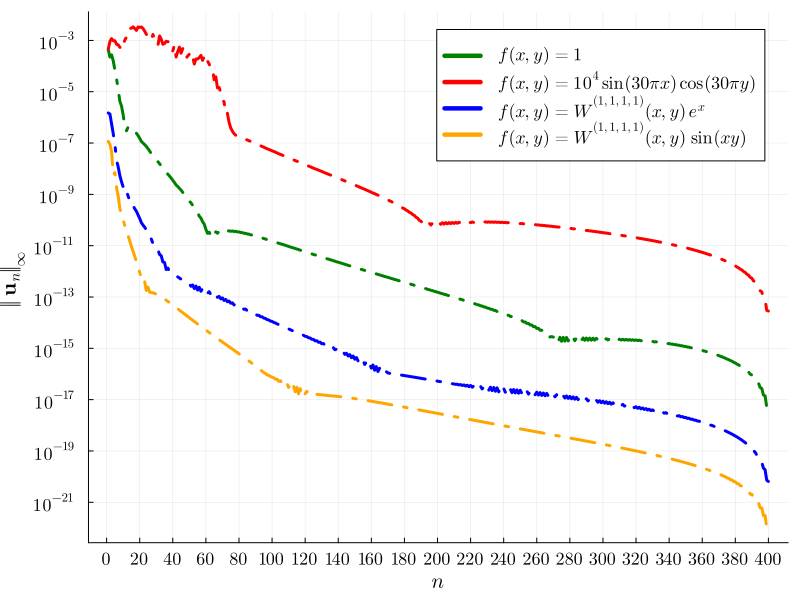

In [6]:
x_vals = 1:400
y_vals11 = zeros(length(x_vals))
y_vals22 = zeros(length(x_vals))
y_vals33 = zeros(length(x_vals))
y_vals44 = zeros(length(x_vals))

for i in 1:length(x_vals)
    n = x_vals[i] 
    y_vals11[i] = norm(koornwinder_coef_u1[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals22[i] = norm(koornwinder_coef_u2[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals33[i] = norm(koornwinder_coef_u3[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
    y_vals44[i] = norm(koornwinder_coef_u4[n*(n+1)÷2+1 : n*(n+1)÷2+n+1], Inf)
end

xtick_exponents = 0:20:400
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = -3:-2:-21
ytick_vals = 10.0 .^ ytick_exponents
ytick_labels = ["\$10^{$(y)}\$" for y in ytick_exponents]

plot(
    x_vals, y_vals11;
    #xaxis = :log10,
    size = (800,600),
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :green,
    marker = :none, 
    label = "\$f(x,y)=1\$",
    legend = :topright,
    tickfontsize = 12,
    legendfontsize = 12,
    guidefontsize = 14
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals22;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :red,
    marker = :none,
    label = "\$f(x,y)= 10^4 \\sin(30\\pi x) \\cos(30 \\pi y)  \$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)

plot!(
    x_vals, y_vals33;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :blue,
    marker = :none,
    label = "\$f(x,y)= W^{(1,1,1,1)}(x,y)\\, e^x \$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)


plot!(
    x_vals, y_vals44;
    #xaxis = :log10,
    yaxis = :log10,
    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    xlabel = "\$n\$",
    ylabel = "\$\\Vert \\mathbf{u}_n \\Vert_{\\infty}\$",
    linewidth = 3,
    linestyle = :dashdot,
    color = :orange,
    marker = :none,
    label = "\$f(x,y) = W^{(1,1,1,1)}(x,y)\\, \\sin(xy) \$",
    legend = :topright
    #legend_position =(0.47, 0.45)
)

In [ ]:
u_approx2 = Koornwinder_synthesis_transform(gkd1, ops2, koornwinder_coef_u2, 2, 2, 2, 2, 200)

# For the numerical examples in the paper, the lengths of x_vals0, x_vals1, y_vals0, and y_vals1 are set to 750.

x_vals1 = range(α, β, length=100) 
y_vals1 = range(0, 0.584, length=100)   
z_vals1 = zeros(length(x_vals1), length(y_vals1))

for i in 1:length(x_vals1)
    for j in 1:length(y_vals1)
        x = x_vals1[i]
        y = y_vals1[j]
        if 0 <= y <= ρ(x)
            z_vals1[i, j] = u_approx2(x,y)     
        else
            z_vals1[i, j] = NaN
        end
    end
end

xtick_exponents = 0.0:0.2:0.8
xtick_vals = xtick_exponents # 10 .^ xtick_exponents
xtick_labels = ["\${$(x)}\$" for x in xtick_exponents]

ytick_exponents = 0.0:0.1:0.5
ytick_vals = ytick_exponents
ytick_labels = ["\${$(y)}\$" for y in ytick_exponents]


contourf(
    x_vals1, y_vals1, z_vals1' .* 1e5;

    xticks = (xtick_vals, xtick_labels),
    yticks = (ytick_vals, ytick_labels),
    framestyle = :box,
    color = :inferno,
    linewidth = 0,
    levels = 100,
    xlabel = "\$x\$",
    ylabel = "\$y\$",
    aspect_ratio = :equal,
    xlims = (α, β),
    ylims = (0, 0.584),
    size = (700, 850),
    grid = false,

    tickfont = font(10),
    guidefont = font(14),
        
)

x_edge = range(α, β, length=1200)
y_top = δ * real.(ρ.(x_edge))
y_bottom = γ * real.(ρ.(x_edge))

y_left = [γ * real(ρ(α)), δ * real(ρ(α))]
y_right = [γ * real(ρ(β)), δ * real(ρ(β))]
plot!(x_edge, y_top, color=:black, lw=1.0, label=false)
plot!(x_edge, y_bottom, color=:black, lw=1.0, label=false)

plot!([α, α], y_left, color=:black, lw=1.0, label=false)
plot!([β, β], y_right, color=:black, lw=1.0, label=false)
annotate!(0.82, 0.62, Plots.text("\$\\times \\, 10^{-5}\$", :left, 14))

![](CurvilinearTrapezium_Biharmonic.png)